In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
data_path = '/content/drive/My Drive/dataset/CK+48/'
data_dir_list = os.listdir(data_path)

img_data_list=[]

def read_data():
  for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    class_num=data_dir_list.index(dataset)
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append([input_img,class_num])

read_data()
        

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-sadness

Loaded the images of dataset-happy

Loaded the images of dataset-anger

Loaded the images of dataset-surprise



In [4]:
image_data=[]
labels=[]
for features,label in img_data_list:
  image_data.append(features)
  labels.append(label)

img_data = np.array(image_data)
img_data = img_data.astype('float32')
img_data = img_data/255

labels=np.array(labels)
img_data.shape

(927, 224, 224, 3)

In [8]:
input_shape=(224,224,3)
vgg = vgg16.VGG16(include_top=True, weights='imagenet')

out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
vgg_model = Model(vgg.input, out)

for layer in vgg_model.layers:
    if layer.name in ['predictions']:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f21a00929b0>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7f21a00394a8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f21a0039668>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f21a0039780>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f21a00399b0>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f21a0070c50>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f214c1db7f0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f214c1db630>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f214c1e3320>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f214c1e3eb8>,block3_conv3,False


In [9]:
vgg_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_data, labels)

10

In [11]:
import matplotlib.pyplot as plt

def cnn_model(x_train,x_test,y_test,y_train):
    vgg = vgg16.VGG16(include_top=True, weights='imagenet')

    out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
    vgg_model = Model(vgg.input, out)

    for layer in vgg_model.layers:
      if layer.name in ['predictions']:
        layer.trainable = True
      else:
        layer.trainable = False
    model = Sequential()
    model.add(vgg_model)
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=50, batch_size=30,verbose=1)

    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/50
834/834 [==============================] - 10s 11ms/step - loss: 1.8601 - accuracy: 0.2902
Epoch 2/50
834/834 [==============================] - 2s 3ms/step - loss: 1.4657 - accuracy: 0.4472
Epoch 3/50
834/834 [==============================] - 2s 3ms/step - loss: 1.3323 - accuracy: 0.5360
Epoch 4/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1747 - accuracy: 0.5875
Epoch 5/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1015 - accuracy: 0.6031
Epoch 6/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0616 - accuracy: 0.6295
Epoch 7/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0003 - accuracy: 0.6199
Epoch 8/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9905 - accuracy: 0.6223
Epoch 9/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9132 - accuracy: 0.6739
Epoch 10/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9121 - accuracy: 0.65

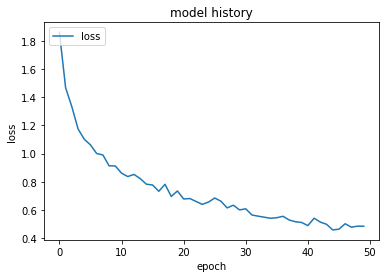

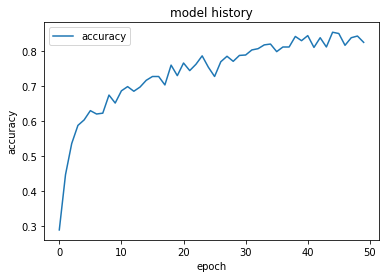

0.7526881694793701
[[ 8  0  2  4  4  0]
 [ 0  4  1  3  0  0]
 [ 0  0  7  0  1  0]
 [ 0  0  0 21  0  0]
 [ 0  0  6  0  7  0]
 [ 0  1  1  0  0 23]]
----------------------------
Epoch 1/50
834/834 [==============================] - 2s 3ms/step - loss: 1.7039 - accuracy: 0.3429
Epoch 2/50
834/834 [==============================] - 2s 3ms/step - loss: 1.3612 - accuracy: 0.5276
Epoch 3/50
834/834 [==============================] - 2s 3ms/step - loss: 1.2784 - accuracy: 0.5252
Epoch 4/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1353 - accuracy: 0.5815
Epoch 5/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0799 - accuracy: 0.5815
Epoch 6/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0285 - accuracy: 0.6283
Epoch 7/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9651 - accuracy: 0.6583
Epoch 8/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9368 - accuracy: 0.6487
Epoch 9/50
834/834 [=====

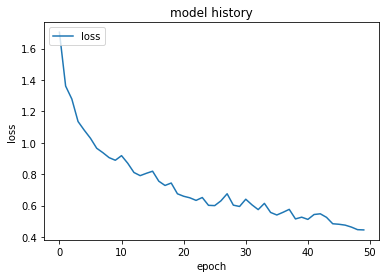

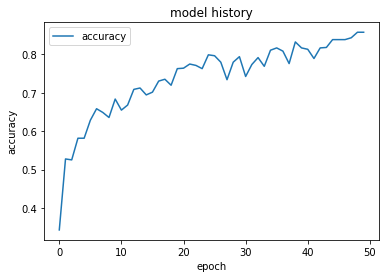

0.7419354915618896
[[18  0  0  0  0  0]
 [ 3  3  0  0  0  2]
 [ 3  0  1  0  2  2]
 [ 1  0  0 19  0  1]
 [ 9  0  0  0  3  1]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 2s 3ms/step - loss: 1.7242 - accuracy: 0.3381
Epoch 2/50
834/834 [==============================] - 2s 3ms/step - loss: 1.3437 - accuracy: 0.5384
Epoch 3/50
834/834 [==============================] - 2s 3ms/step - loss: 1.2124 - accuracy: 0.5659
Epoch 4/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1560 - accuracy: 0.5647
Epoch 5/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1047 - accuracy: 0.6067
Epoch 6/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0329 - accuracy: 0.6295
Epoch 7/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9429 - accuracy: 0.6427
Epoch 8/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9301 - accuracy: 0.6523
Epoch 9/50
834/834 [=====

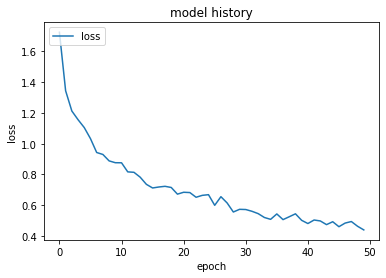

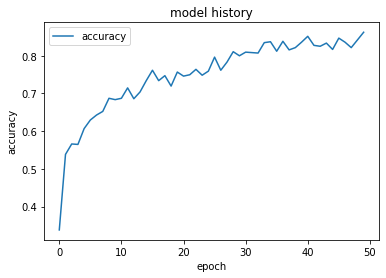

0.774193525314331
[[15  0  1  2  0  0]
 [ 0  4  0  2  0  1]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 5  0  6  0  2  0]
 [ 0  1  3  0  0 21]]
----------------------------
Epoch 1/50
834/834 [==============================] - 2s 3ms/step - loss: 1.7710 - accuracy: 0.3082
Epoch 2/50
834/834 [==============================] - 2s 3ms/step - loss: 1.4119 - accuracy: 0.4988
Epoch 3/50
834/834 [==============================] - 2s 3ms/step - loss: 1.2495 - accuracy: 0.5564
Epoch 4/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1386 - accuracy: 0.6127
Epoch 5/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0535 - accuracy: 0.6295
Epoch 6/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0447 - accuracy: 0.6211
Epoch 7/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9678 - accuracy: 0.6607
Epoch 8/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9323 - accuracy: 0.6583
Epoch 9/50
834/834 [======

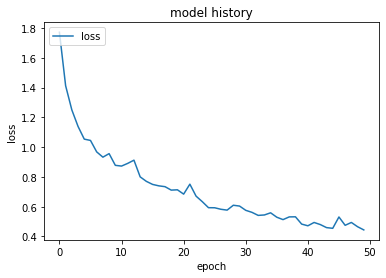

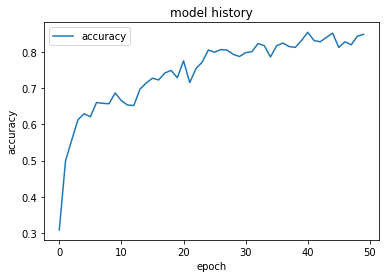

0.7419354915618896
[[15  1  0  2  0  0]
 [ 1  2  2  2  0  0]
 [ 1  1  4  0  2  1]
 [ 2  0  0 18  0  0]
 [ 7  0  0  0  7  0]
 [ 1  0  0  1  0 23]]
----------------------------
Epoch 1/50
834/834 [==============================] - 2s 3ms/step - loss: 1.7719 - accuracy: 0.3549
Epoch 2/50
834/834 [==============================] - 2s 3ms/step - loss: 1.4511 - accuracy: 0.4760
Epoch 3/50
834/834 [==============================] - 2s 3ms/step - loss: 1.3820 - accuracy: 0.5240
Epoch 4/50
834/834 [==============================] - 2s 3ms/step - loss: 1.2175 - accuracy: 0.5827
Epoch 5/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1142 - accuracy: 0.6163
Epoch 6/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1138 - accuracy: 0.5995
Epoch 7/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9979 - accuracy: 0.6439
Epoch 8/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0009 - accuracy: 0.6223
Epoch 9/50
834/834 [=====

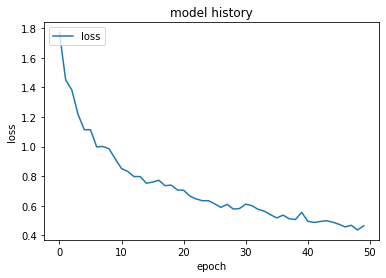

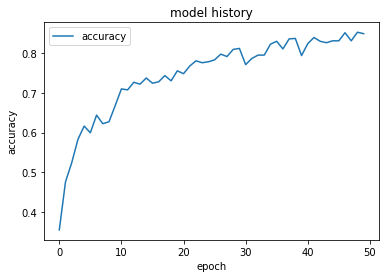

0.7419354915618896
[[17  0  0  1  0  0]
 [ 0  2  0  1  0  4]
 [ 0  0  2  0  2  5]
 [ 1  1  0 18  0  0]
 [ 4  0  3  0  5  2]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 2s 3ms/step - loss: 1.7966 - accuracy: 0.3022
Epoch 2/50
834/834 [==============================] - 2s 3ms/step - loss: 1.4963 - accuracy: 0.4496
Epoch 3/50
834/834 [==============================] - 2s 3ms/step - loss: 1.2474 - accuracy: 0.5612
Epoch 4/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1931 - accuracy: 0.5659
Epoch 5/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1483 - accuracy: 0.5911
Epoch 6/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0347 - accuracy: 0.6391
Epoch 7/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0457 - accuracy: 0.6259
Epoch 8/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9784 - accuracy: 0.6547
Epoch 9/50
834/834 [=====

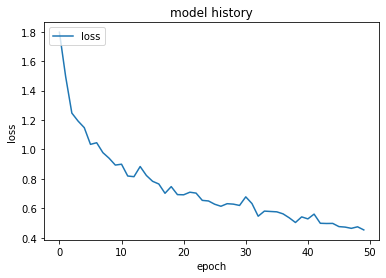

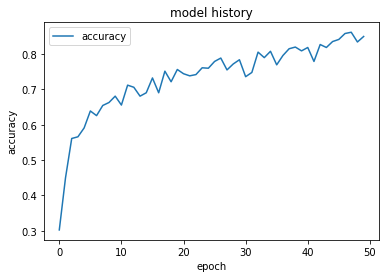

0.8064516186714172
[[14  2  0  2  0  0]
 [ 0  4  2  0  0  1]
 [ 0  2  4  0  3  0]
 [ 1  0  0 19  0  0]
 [ 4  0  1  0  9  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
834/834 [==============================] - 2s 3ms/step - loss: 1.9046 - accuracy: 0.2662
Epoch 2/50
834/834 [==============================] - 2s 3ms/step - loss: 1.4012 - accuracy: 0.5108
Epoch 3/50
834/834 [==============================] - 2s 3ms/step - loss: 1.2732 - accuracy: 0.5647
Epoch 4/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1831 - accuracy: 0.5791
Epoch 5/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1900 - accuracy: 0.5695
Epoch 6/50
834/834 [==============================] - 2s 3ms/step - loss: 1.1444 - accuracy: 0.5947
Epoch 7/50
834/834 [==============================] - 2s 3ms/step - loss: 1.0193 - accuracy: 0.6139
Epoch 8/50
834/834 [==============================] - 2s 3ms/step - loss: 0.9773 - accuracy: 0.6487
Epoch 9/50
834/834 [=====

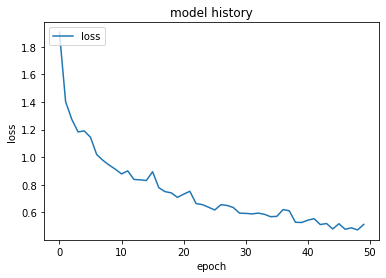

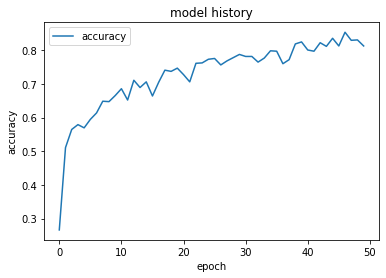

0.7204301357269287
[[10  0  3  4  1  0]
 [ 0  6  0  1  0  0]
 [ 2  0  5  0  1  0]
 [ 0  0  3 18  0  0]
 [ 0  0  8  0  6  0]
 [ 0  0  3  0  0 22]]
----------------------------
Epoch 1/50
835/835 [==============================] - 3s 4ms/step - loss: 1.8509 - accuracy: 0.3006
Epoch 2/50
835/835 [==============================] - 2s 3ms/step - loss: 1.3881 - accuracy: 0.5222
Epoch 3/50
835/835 [==============================] - 2s 3ms/step - loss: 1.3027 - accuracy: 0.5198
Epoch 4/50
835/835 [==============================] - 2s 3ms/step - loss: 1.1628 - accuracy: 0.5964
Epoch 5/50
835/835 [==============================] - 2s 3ms/step - loss: 1.1097 - accuracy: 0.5976
Epoch 6/50
835/835 [==============================] - 2s 3ms/step - loss: 1.0027 - accuracy: 0.6743
Epoch 7/50
835/835 [==============================] - 2s 3ms/step - loss: 0.9725 - accuracy: 0.6754
Epoch 8/50
835/835 [==============================] - 2s 3ms/step - loss: 0.9660 - accuracy: 0.6551
Epoch 9/50
835/835 [=====

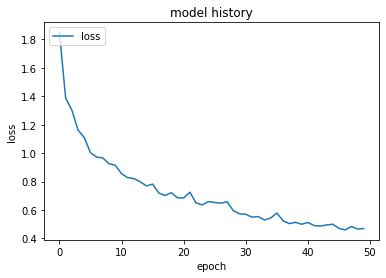

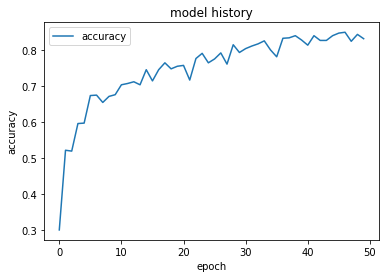

0.72826087474823
[[13  0  2  2  0  0]
 [ 2  5  0  1  0  0]
 [ 1  0  5  2  0  0]
 [ 2  0  0 19  0  0]
 [12  0  0  1  1  0]
 [ 0  0  0  0  0 24]]
----------------------------
Epoch 1/50
835/835 [==============================] - 2s 3ms/step - loss: 1.7773 - accuracy: 0.3054
Epoch 2/50
835/835 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.4479
Epoch 3/50
835/835 [==============================] - 2s 3ms/step - loss: 1.2510 - accuracy: 0.5749
Epoch 4/50
835/835 [==============================] - 2s 3ms/step - loss: 1.1429 - accuracy: 0.5988
Epoch 5/50
835/835 [==============================] - 2s 3ms/step - loss: 1.0783 - accuracy: 0.6012
Epoch 6/50
835/835 [==============================] - 2s 3ms/step - loss: 1.0474 - accuracy: 0.6347
Epoch 7/50
835/835 [==============================] - 2s 3ms/step - loss: 1.0130 - accuracy: 0.6407
Epoch 8/50
835/835 [==============================] - 2s 3ms/step - loss: 0.9818 - accuracy: 0.6527
Epoch 9/50
835/835 [=======

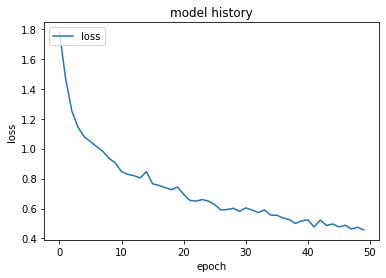

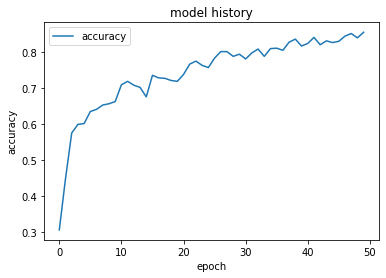

0.8369565010070801
[[15  0  1  0  1  0]
 [ 0  4  2  0  0  2]
 [ 1  0  7  0  0  0]
 [ 0  1  1 18  1  0]
 [ 2  0  3  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/50
835/835 [==============================] - 2s 3ms/step - loss: 1.8026 - accuracy: 0.2982
Epoch 2/50
835/835 [==============================] - 2s 3ms/step - loss: 1.4465 - accuracy: 0.4539
Epoch 3/50
835/835 [==============================] - 2s 3ms/step - loss: 1.3243 - accuracy: 0.5210
Epoch 4/50
835/835 [==============================] - 2s 3ms/step - loss: 1.1985 - accuracy: 0.5653
Epoch 5/50
835/835 [==============================] - 2s 3ms/step - loss: 1.1042 - accuracy: 0.6132
Epoch 6/50
835/835 [==============================] - 2s 3ms/step - loss: 1.0734 - accuracy: 0.6048
Epoch 7/50
835/835 [==============================] - 3s 3ms/step - loss: 1.0693 - accuracy: 0.6084
Epoch 8/50
835/835 [==============================] - 2s 3ms/step - loss: 0.9807 - accuracy: 0.6275
Epoch 9/50
835/835 [=====

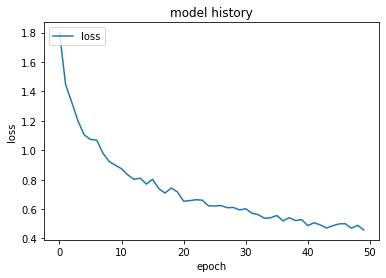

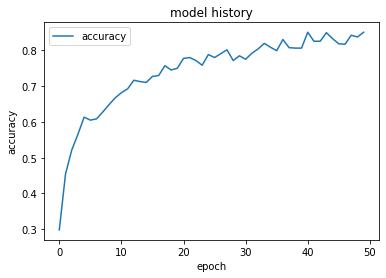

0.72826087474823
[[14  0  1  0  2  0]
 [ 1  0  2  3  1  1]
 [ 0  0  7  0  0  1]
 [ 0  0  6 14  1  0]
 [ 3  0  2  0  8  0]
 [ 0  0  1  0  0 24]]
----------------------------


In [12]:
prediction=[]
confusion_list=[]
num_classes = 6
for train_index, test_index in skf.split(img_data, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img_data[train_index], img_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    x_train=x_train.reshape(x_train.shape[0],img_data.shape[1],img_data.shape[2],img_data.shape[3])
    x_test=x_test.reshape(x_test.shape[0],img_data.shape[1],img_data.shape[2],img_data.shape[3])
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("----------------------------")

In [13]:
print(prediction)

[0.7526881694793701, 0.7419354915618896, 0.774193525314331, 0.7419354915618896, 0.7419354915618896, 0.8064516186714172, 0.7204301357269287, 0.72826087474823, 0.8369565010070801, 0.72826087474823]


In [14]:
for x in range(len(confusion_list)): 
    print (confusion_list[x],sep = "\n")
    print("----------------------------")    

[[ 8  0  2  4  4  0]
 [ 0  4  1  3  0  0]
 [ 0  0  7  0  1  0]
 [ 0  0  0 21  0  0]
 [ 0  0  6  0  7  0]
 [ 0  1  1  0  0 23]]
----------------------------
[[18  0  0  0  0  0]
 [ 3  3  0  0  0  2]
 [ 3  0  1  0  2  2]
 [ 1  0  0 19  0  1]
 [ 9  0  0  0  3  1]
 [ 0  0  0  0  0 25]]
----------------------------
[[15  0  1  2  0  0]
 [ 0  4  0  2  0  1]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 5  0  6  0  2  0]
 [ 0  1  3  0  0 21]]
----------------------------
[[15  1  0  2  0  0]
 [ 1  2  2  2  0  0]
 [ 1  1  4  0  2  1]
 [ 2  0  0 18  0  0]
 [ 7  0  0  0  7  0]
 [ 1  0  0  1  0 23]]
----------------------------
[[17  0  0  1  0  0]
 [ 0  2  0  1  0  4]
 [ 0  0  2  0  2  5]
 [ 1  1  0 18  0  0]
 [ 4  0  3  0  5  2]
 [ 0  0  0  0  0 25]]
----------------------------
[[14  2  0  2  0  0]
 [ 0  4  2  0  0  1]
 [ 0  2  4  0  3  0]
 [ 1  0  0 19  0  0]
 [ 4  0  1  0  9  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[10  0  3  4  1  0]
 [ 0  6  0  1  0  0]
 [ 2  0  5  0  1  0]
 